In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

# Loading Bengaluru_House_Data into dataframe 

In [2]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
# get row-column size 
df1.shape 

(13320, 9)

In [4]:
# get all columns in table
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
# get unique values from area_type feature/column
df1['area_type'].unique()


array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
# get count of unique values in area_type feature
df1['area_type'].value_counts()


area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

# We are dropping the features that are not required to build our model

In [7]:
# dropping the features
df2 = df1.drop(['area_type','balcony', 'availability', 'society'], axis = 'columns')
df2.shape

(13320, 5)

# Data Cleaning : Handling NA values

In [8]:
# get count of null values in all features
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df2.shape


(13320, 5)

In [10]:
# dropping the NA (Not Available values in all fetures)
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df3.shape

(13246, 5)

In [12]:
# Feature Engineering

In [13]:
# Adding new feature - bhk for (bed,hall,kitchen) and making it of "integer" type

df3['size']

# size has unique types of values. so we take the initial integer value for our convenience and 
# add it to a new feature/column called 'bhk'

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13246, dtype: object

In [14]:
# splitting the size feature value into 2 parts and taking the 1st value at 0th index
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique() # is same as -  df3['bhk'].unique()


C:\Users\HP\AppData\Local\Temp\ipykernel_14208\945633967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
# df3.head()

df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
# writing a function for values like '1133 - 1384' in total_sqft

def is_float(x):
    try:
        float(x)
    except:
        return False 
    return True
        

In [17]:
# it returns sqft values that can be converted into float
df3[df3['total_sqft'].apply(is_float)].head(10)

# it returns sqft values that cannot be directly converted to float 
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [18]:
# above the sqft values can be a range (like 2100 - 2850)
# so we will take average of min and max value in range.
# other values like 34.46 sq meter are dropped for keeping things simple 
# though we can convert the sq m into sq ft 

def convert_sqft_to_num_avg(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try: 
        return float(x)
    except:
        return None

In [19]:
# Applying above function on df4

df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num_avg)
# df4.isnull().sum()
df4 = df4[df4.total_sqft.notnull()]
df4.head()



,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [20]:
# locating the value at 30th number in table
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

# Feature Engineering

In [21]:
 # getting the per square feet price
df5 = df4.copy()
df5['price_per_sqft'] = df5['price'] * 100000 /df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [22]:
# there are many locations, so let's work on that now
# get unique locations

df5.location.unique()

# length of all locations available
len(df5.location.unique())

1298

In [23]:
# strip the extra spaces in names of locations 
df5.location = df5.location.apply(lambda x: x.strip())

# count per location to decide which locations have maximum and minimum counts
# location_stats = df5.groupby('location')['location'].agg('count')

location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [24]:
# locations having count < 20

len(location_stats[location_stats < 20])
 

1139

In [25]:
# put locations count less than 20 into variable below
location_stats_less_than_20 = location_stats[location_stats < 20]
location_stats_less_than_20

location
Kalyan nagar             19
Kaggalipura              19
HRBR Layout              19
Pai Layout               19
OMBR Layout              19
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1139, dtype: int64

In [26]:
# total locations before adding "other" category
len(df5.location.unique())

1287

Examined the location variable(categorical). applying the dimensionality reduction technique here to reduce number of locations.
(for that creating the "other" category)

In [27]:
# total locations after adding "other" category

df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_20 else x)
len(df5.location.unique())

# now we have 149 unique locations by 
# adding the locations having count less than 20 to "other" locations

149

In [28]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,other,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [29]:
location_stats.values.sum()

13200

In [30]:
# less than 20 count locations
len(location_stats[location_stats < 20]) 

1139

In [31]:
# more than 20 counts locations
len(location_stats[location_stats > 20])

143

In [32]:
# equal to 20 count locations
len(location_stats[location_stats == 20])

5

In [33]:
# total unique locations
len(location_stats)

1287

# Outlier removal 

Normally, consider the each bedroom is 300 sq.feet. If 2bhk apartment is of 400 sq.feet, that is wrong data and these type of data should be removed as outliers. for that minimum size per bedroom is 300 sq.ft.

In [34]:
df5[df5.total_sqft / df5.bhk < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,other,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


1020/6 < 300 and 600/8 < 300 -> this is false data. 
Removing this data from dataframe

In [35]:
df5.shape

(13200, 7)

Negating(~) or removing the data where bedrooms are less than 300 sq.ft.

In [36]:
df6 = df5[~(df5.total_sqft / df5.bhk < 300)]
df5.shape

(13200, 7)

# outlier removal using standard deviation and mean

In [37]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Here, the min price per sqft is 267 rs/sqft and max value is 176470 rs/sqft
which is a large variation between property prices. These outliers should be 
removed using mean and standard deviation

In [38]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape
        
        

(10418, 7)

Check what is the price of 2bhk and 3bhk flats of same area. If the 2bhk flat has more price for total sqft area than 3bhk flat
in the same location, we need to remove these types of outliers. 

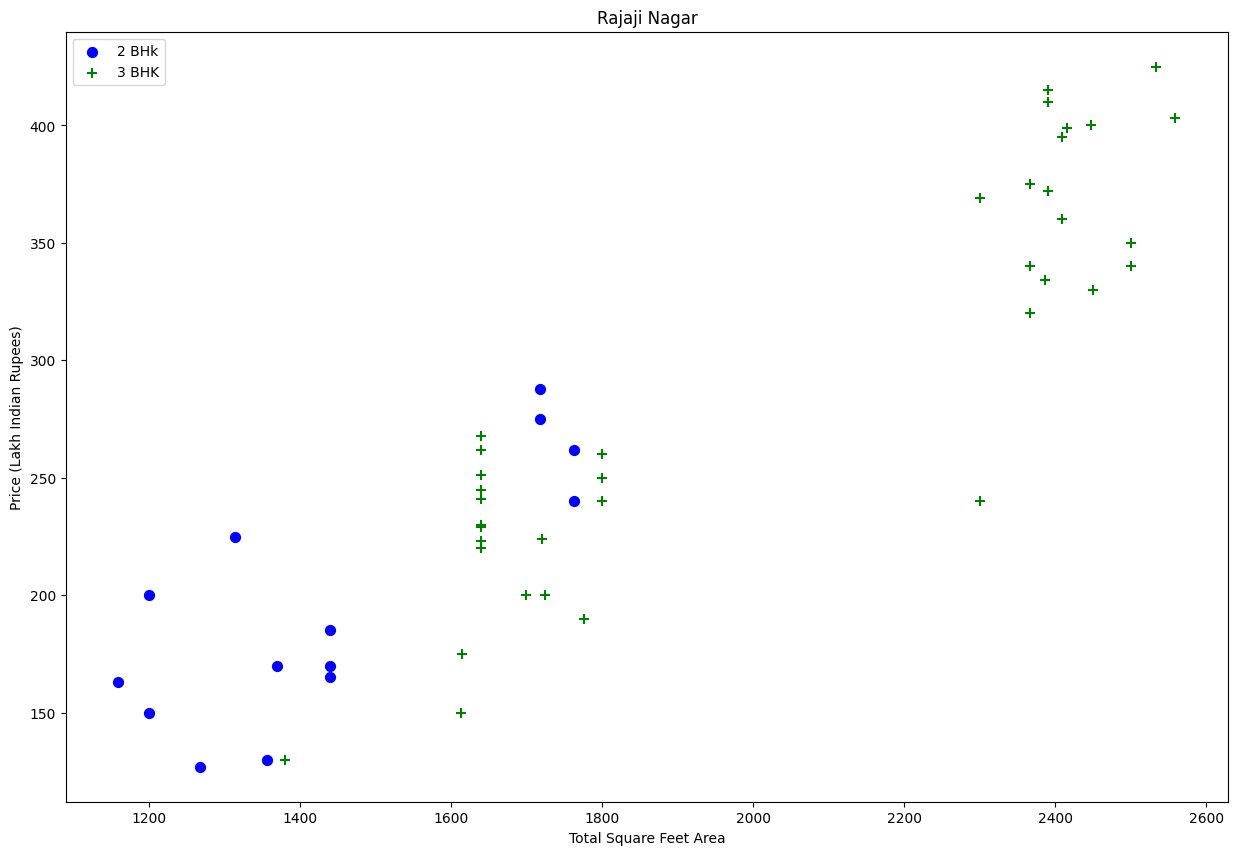

In [39]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHk', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7, "Rajaji Nagar")

We have to remove the properties (for example) where for same location, the price of 3 bhk apartment is less than 2 bhk apartment having same sqft area.  
For that we will build a dictionary of stats per bhk i.e.

{
  '1' : {
       'mean' : 4000,
       'std' : 2000,
       'count' : 34
  },
  
  '2' : {
       'mean' : 4300,
       'std' : 2300,
       'count' : 22
  },
}

Remove those 2 bhk apartments whose price_per_sqft is less than mean price_per_sqft of 1 bhk apartment

In [40]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(6994, 7)

plot same scatter chart again to see price_per_sqft for 2 bhk and 3 bhk 

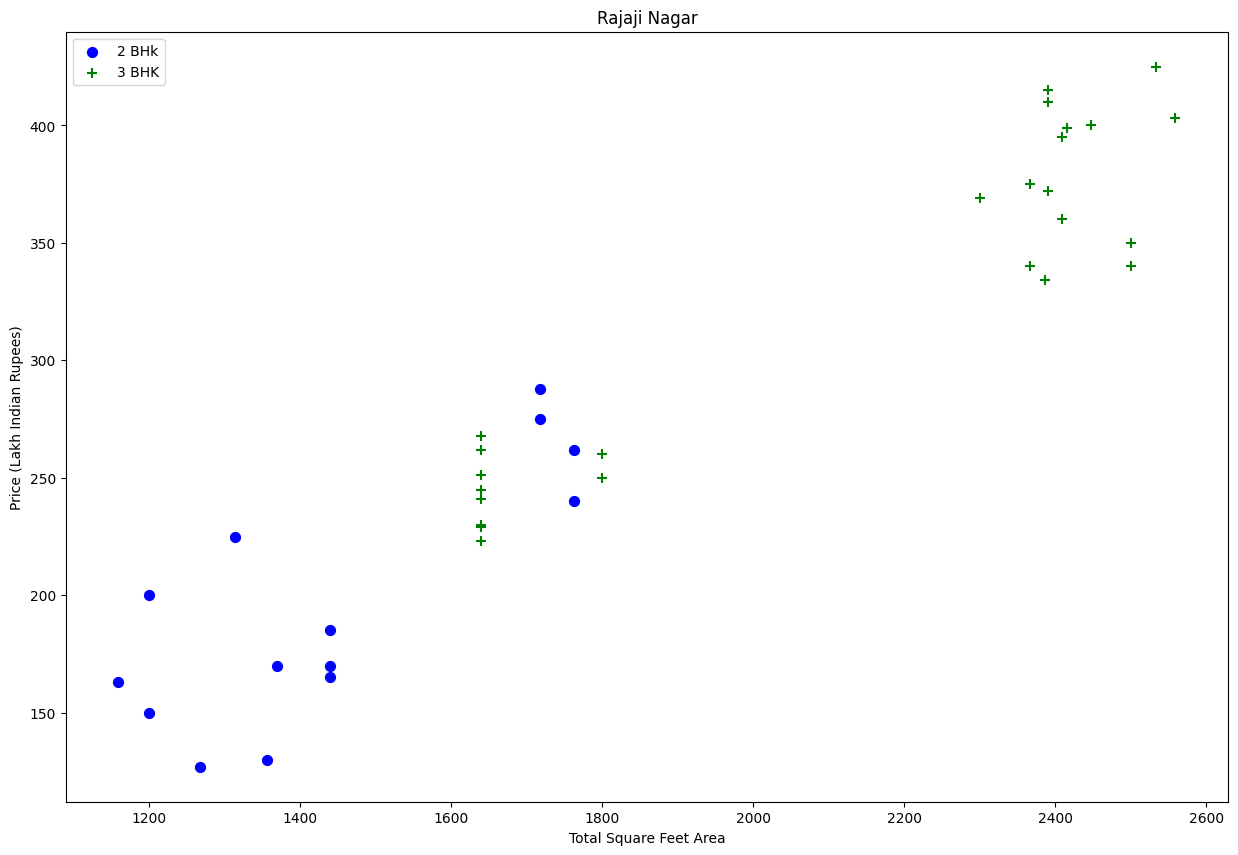

In [41]:
plot_scatter_chart(df8, "Rajaji Nagar")

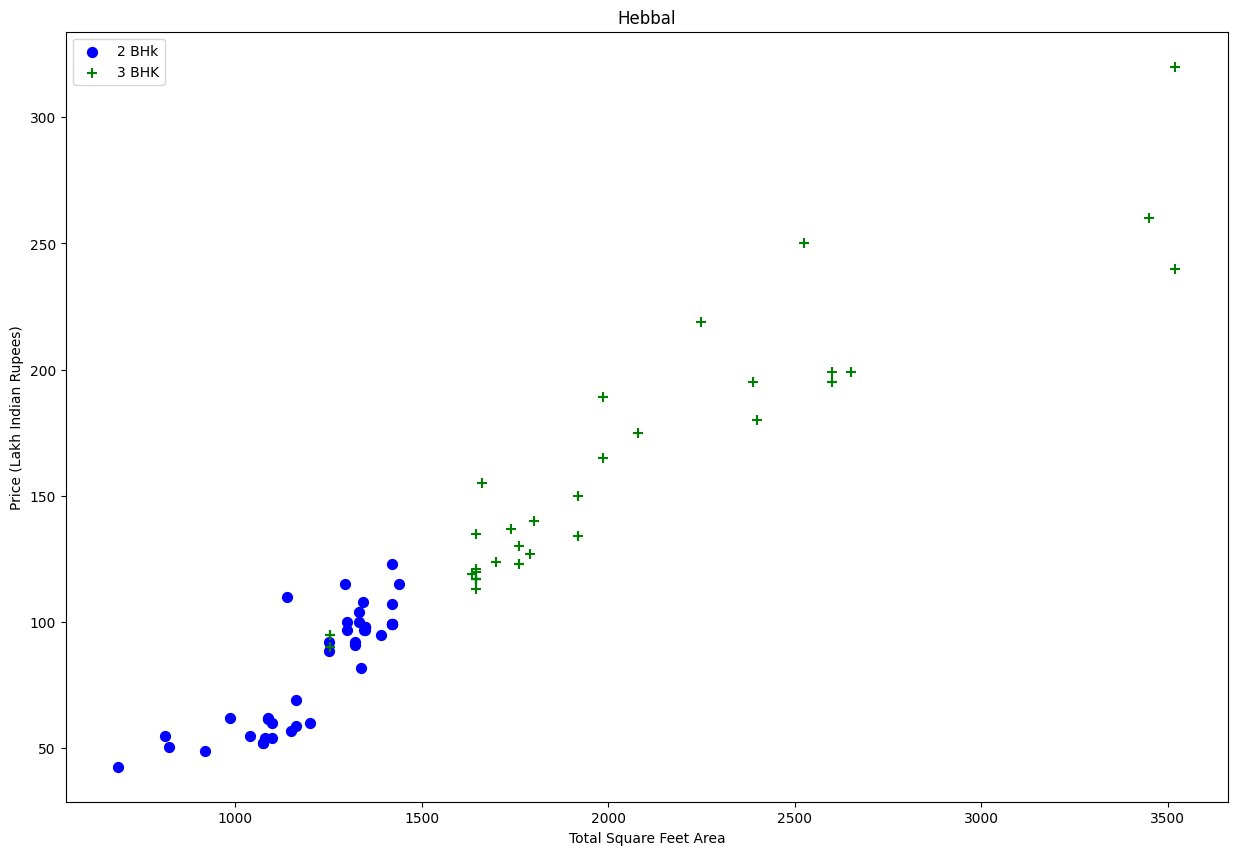

In [42]:
plot_scatter_chart(df8, "Hebbal")

Histogram for price_per_sqft 

Text(0, 0.5, 'count')

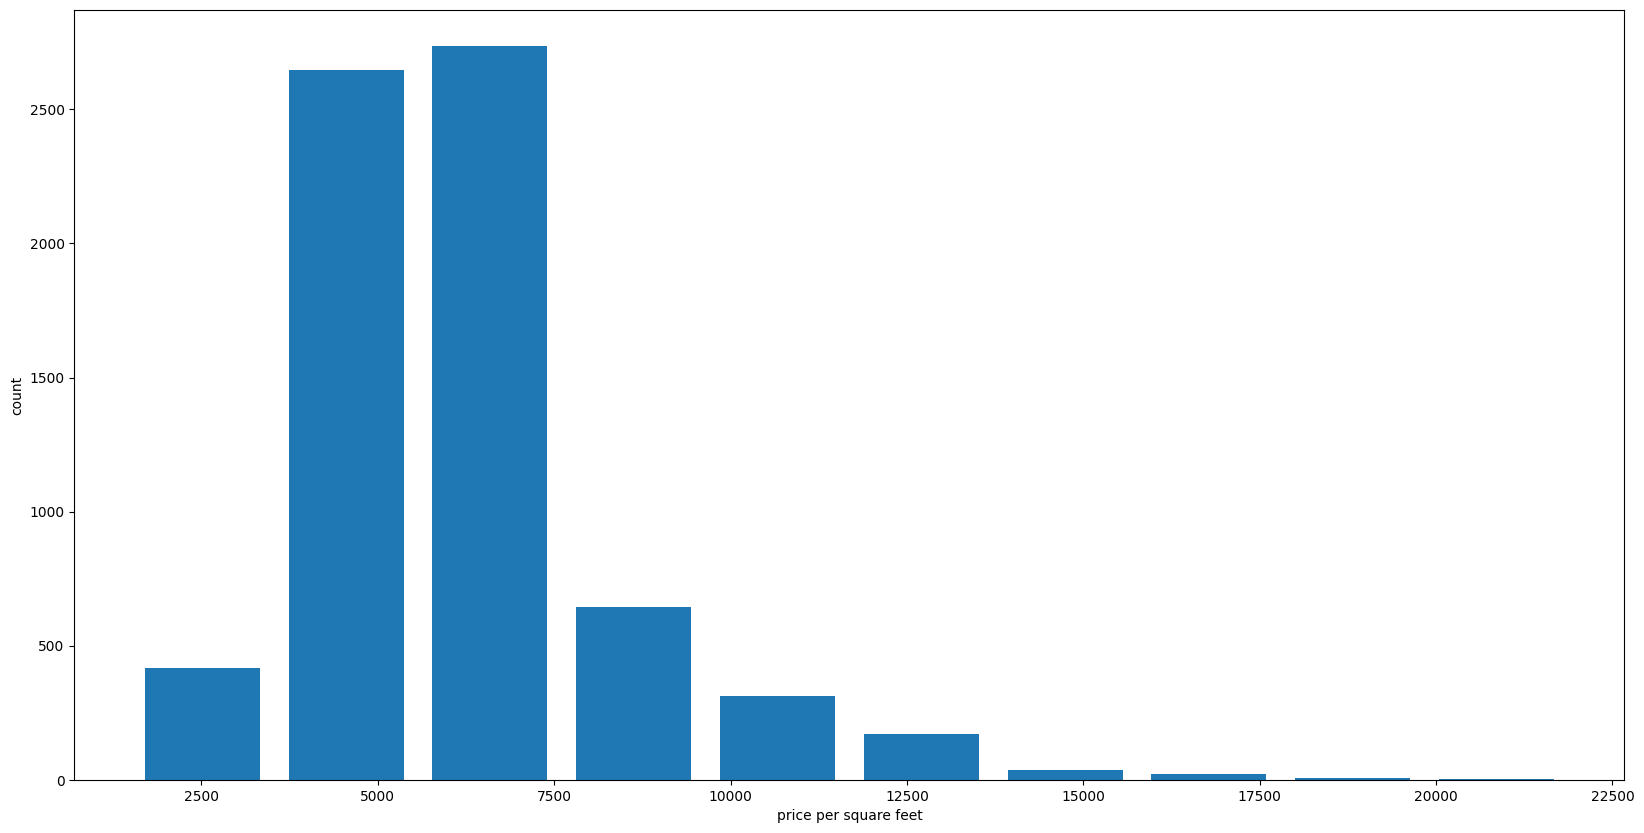

In [43]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft, rwidth = 0.8)
plt.xlabel("price per square feet")
plt.ylabel("count")

# Outlier removal using bathroom feature

In [44]:
df8.bath.unique()

array([ 3.,  5.,  4.,  2.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

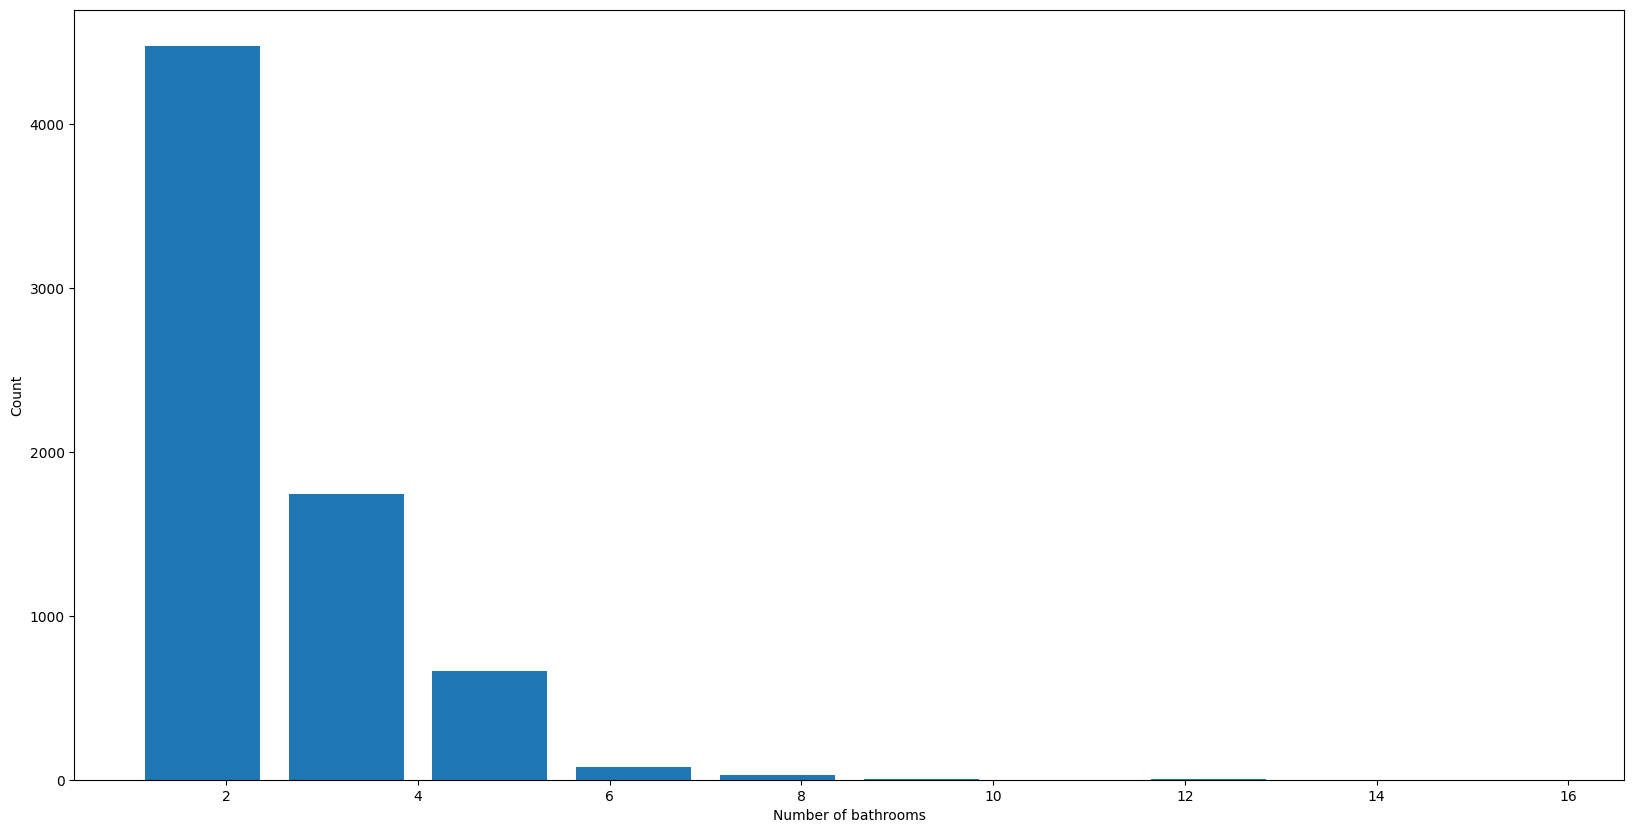

In [45]:
plt.hist(df8.bath, rwidth = 0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [46]:
df8[df8.bath > 10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7865,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8005,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9056,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9224,other,10 BHK,4000.0,12.0,160.0,10,4000.000000
9557,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


It is unususal to have 2 more bathrooms than number of bedrooms in a home

In [47]:
df8[df8.bath > df8.bhk + 2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5867,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
7748,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
9914,other,4 Bedroom,7000.0,8.0,450.0,4,6428.571429


If you have 4 bedroom home and even if you have a bathroom in all 4 rooms plus one guest bathroom, you will have total bathroom = total bedroom + 1vmax.
Anything above that is an outlier or data error that has to be removed.

In [48]:
df9 = df8[df8.bath < df8.bhk + 2]

In [49]:
df9.shape

(6917, 7)

In [50]:
df9.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667
2,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,85.0,5,5666.666667


In [51]:
# drop unnecessary features such as "size" - because we have "bhk" for that and
# drop price_per_sqft - beacuse this feature was created to detect and remove outliers

df10 = df9.drop(['size', 'price_per_sqft'], axis = 'columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
1,1st Phase JP Nagar,1875.0,3.0,167.0,3
2,1st Phase JP Nagar,1500.0,5.0,85.0,5
3,1st Phase JP Nagar,2065.0,4.0,210.0,3


# Building model.....

In [52]:
# Our machine learning model cannot interpret text data. We have 'location' variable in text format. 
# To interpret 'location' data(converting it inot a numeric column), using 'get_dummies()' method from pandas
# this is called "one hot encoding". 

dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,...,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
# to avoid "dummy variable trap" we delete 1 column from dataframe
df11 = pd.concat([df10, dummies.drop('other', axis = 'columns')], axis = 'columns')
df11.head(3)

,location,total_sqft,bath,price,bhk,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
1,1st Phase JP Nagar,1875.0,3.0,167.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Phase JP Nagar,1500.0,5.0,85.0,5,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Phase JP Nagar,2065.0,4.0,210.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
# dropping the 'location' column, because we have used one hot encoding by creating dummies
df12 = df11.drop('location', axis = 'columns')
df12.head(3)

,total_sqft,bath,price,bhk,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
1,1875.0,3.0,167.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1500.0,5.0,85.0,5,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2065.0,4.0,210.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
df12.shape

(6917, 152)

In [56]:
# all X variables should be independant, so drop 'price' which is dependant.

X = df12.drop('price', axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
1,1875.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1500.0,5.0,5,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2065.0,4.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:
Y = df12.price
Y.head(3)

1    167.0
2     85.0
3    210.0
Name: price, dtype: float64

In [58]:
# importing train_test_split --> to split the dataset into training and testing dataset

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

# test_size = 0.2 --> because using only 20% of data for testing i.e. 80% of data for training model

In [59]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression() # created linear regresssion model
lr_clf.fit(X_train, Y_train) # training on X,Y variables 
lr_clf.score(X_test, Y_test)  # score of how good our model is! that's 80% in o/p

0.8249776287167627

In [60]:
# K fold cross validation to check accuracy of LinearRegression model

from sklearn.model_selection import ShuffleSplit   
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)     # -->  ShuffleSplit randomly splits data 

# combining data samples randomly to train data and return a array of each cross-validation estimate
cross_val_score(LinearRegression(), X, Y, cv=cv)   # so estimate is around 80% mostly down in o/p

array([0.75434017, 0.82883974, 0.85411429, 0.85773411, 0.75848033])

In [61]:
# now we checked score / accuracy for LinearRegression model
# But we also need to check the other regression models, like lasso regression, decision tree regression
# This is done to check --> is there any other model that can give more better results ?
# As we splitted the input randomly in 'k' folds and tested on LinearRegression model, we would do same for other models also.

from sklearn.model_selection import GridSearchCV # GridSearchCV used for training data on multiple models
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,Y): # finds best model to get better results
    algos = {
        'linear_regression' : {
            'model': LinearRegression(), # trains on LinearRegression
            'params': {}   # LinearRegression does not have any hyperparameters to train with like decison tree, lasso
        },
        'lasso': {
            'model': Lasso(),   # trains on Lasso regression
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(), # trains on decision tree regression
            'params': {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) # splits input in 5 splits and randomly shuffles data samples
    for algo_name, config in algos.items():      
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,       # these lines give model name with its accuracy score and best parameters 
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X, Y) # function call 
 

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py", line 177, i

,model,best_score,best_params
0,linear_regression,0.810702,{}
1,lasso,0.723821,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.715901,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [62]:
# So, from above LINEAR REGRESSION  models proves to be best for our data i.e. 81%

In [67]:
# Testing our model to predict house prices

# returns house price by taking location,sqft,bath,bhk as arguments. 
def predict_price(location,sqft,bath,bhk):
    if location in X.columns:
        loc_index = np.where(X.columns==location)[0][0]
    else:
        loc_index = -1

    x = np.zeros(len(X.columns))
    x[0] = sqft  # square feet input
    x[1] = bath  # bathrooms number input
    x[2] = bhk   # bhk number input
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]


In [69]:
predict_price('1st phase JP Nagar', 2000, 3, 3)  # house price is --> 1 crore 61 lakhs 

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


161.1898335876957

In [70]:
predict_price('1st Phase JP Nagar',1000, 3, 3)  # house price --> 82 lakhs

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.59553179907891

In [71]:
predict_price('Indira Nagar',1000, 2, 2)  # house price --> 1 crore 96 lakhs

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


196.66978001034286

In [73]:
predict_price('Indira Nagar', 2000, 3, 3)  # 2 crore 85 lakhs

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


285.0322716415028

In [80]:
# Export our machine learning model to a pickle file.

import pickle
with open('banglore_home_prices_model.pickle','wb') as f:  # when model passed as argument it generates the pickle file
    pickle.dump(lr_clf,f)  # passing our model classifier as an argument

In [81]:
# putting our data columns into json file
import json
columns = {  # columns values conerted into lower case to avoid any names conflict 
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:   # creates this file when columns are passed as arguments
    f.write(json.dumps(columns))    # dumping columns into json file

In [ ]:
# this pickle file and json file will be used by python flask server to get output house price.